In [1]:
import splitfolders

In [2]:
input_folder = "data"
output_folder = "output_folder"


In [3]:
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.8, 0.2), group_prefix=None)

Copying files: 7553 files [00:02, 3124.62 files/s]


In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.utils import shuffle

In [25]:
print("The number of images with facemask:",len(os.listdir('data/with_mask')))
print("The number of images without facemask:",len(os.listdir('data/without_mask')))
IMG_HEIGHT = 150
IMG_WIDTH = 150

The number of images with facemask: 3725
The number of images without facemask: 3828


In [26]:
model = tf.keras.models.Sequential([
    Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.3), 
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')  
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
acc = 0
val_loss = 0
val_acc = 0
loss = 0
val_loss = 0
epochs = 30

In [32]:
def trainModel():
  training_dir = "output_folder/train"
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  train_generator = train_datagen.flow_from_directory(training_dir, 
                                                      batch_size=10, 
                                                      target_size=(IMG_WIDTH, IMG_HEIGHT))
  validation_dir = "output_folder/test"
  validation_datagen = ImageDataGenerator(rescale=1.0/255)
  validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                           batch_size=10, 
                                                           target_size=(IMG_WIDTH, IMG_HEIGHT))
  checkpoint = ModelCheckpoint('model-{epoch:03d}.model.keras',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
  es = EarlyStopping(monitor='loss', patience=5)

  history = model.fit(train_generator,
                                epochs=epochs,
                                validation_data=validation_generator,
                                callbacks=[checkpoint, es])
  global acc
  acc = history.history['accuracy']
  global val_acc
  val_acc = history.history['val_accuracy']
  global loss
  loss = history.history['loss']
  global val_loss
  val_loss = history.history['val_loss']

In [33]:
print("The number of images in train folder with facemask:",len(os.listdir('output_folder/train/with_mask')))
print("The number of images in train folder without facemask:",len(os.listdir('output_folder/train/without_mask')))
print("The number of images in test folder with facemask:",len(os.listdir('output_folder/test/with_mask')))
print("The number of images in test folder without facemask:",len(os.listdir('output_folder/test/without_mask')))

The number of images in train folder with facemask: 2980
The number of images in train folder without facemask: 3062
The number of images in test folder with facemask: 745
The number of images in test folder without facemask: 766


In [34]:
def plot():
  epochs_range = range(epochs)
  plt.figure(figsize=(6, 6))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

Found 6042 images belonging to 2 classes.
Found 1511 images belonging to 2 classes.
Epoch 1/30


c:\Users\Martin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 34/605 ━━━━━━━━━━━━━━━━━━━━ 1:13 129ms/step - accuracy: 0.6304 - loss: 0.8654

c:\Users\Martin\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


605/605 ━━━━━━━━━━━━━━━━━━━━ 99s 161ms/step - accuracy: 0.7514 - loss: 0.5362 - val_accuracy: 0.8736 - val_loss: 0.2908
Epoch 2/30
605/605 ━━━━━━━━━━━━━━━━━━━━ 82s 135ms/step - accuracy: 0.8313 - loss: 0.4073 - val_accuracy: 0.9080 - val_loss: 0.2249
Epoch 3/30
605/605 ━━━━━━━━━━━━━━━━━━━━ 75s 123ms/step - accuracy: 0.8547 - loss: 0.3499 - val_accuracy: 0.9186 - val_loss: 0.2063
Epoch 4/30
605/605 ━━━━━━━━━━━━━━━━━━━━ 74s 122ms/step - accuracy: 0.8699 - loss: 0.3153 - val_accuracy: 0.9239 - val_loss: 0.1892
Epoch 5/30
605/605 ━━━━━━━━━━━━━━━━━━━━ 72s 119ms/step - accuracy: 0.8833 - loss: 0.2931 - val_accuracy: 0.8848 - val_loss: 0.3041
Epoch 6/30
605/605 ━━━━━━━━━━━━━━━━━━━━ 80s 131ms/step - accuracy: 0.8892 - loss: 0.2792 - val_accuracy: 0.9471 - val_loss: 0.1593
Epoch 7/30
605/605 ━━━━━━━━━━━━━━━━━━━━ 71s 117ms/step - accuracy: 0.8911 - loss: 0.2682 - val_accuracy: 0.9391 - val_loss: 0.1741
Epoch 8/30
605/605 ━━━━━━━━━━━━━━━━━━━━ 73s 120ms/step - accuracy: 0.9050 - loss: 0.2534 - val

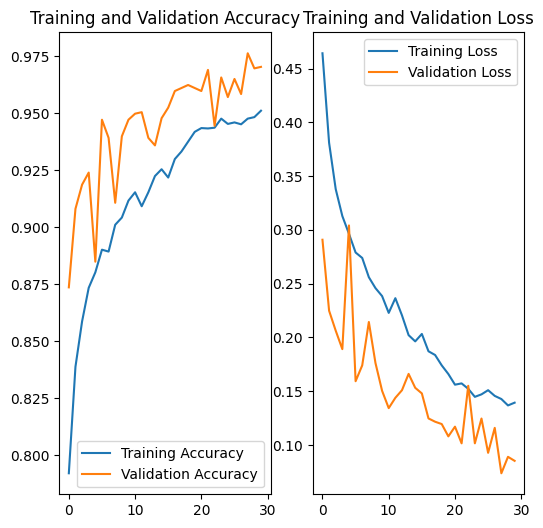

In [35]:
trainModel()
plot()